In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x2557c9b3640>)

In [3]:
train_data = pd.read_table('ratings.txt')

In [4]:
train_data[:10] # 상위 10개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [5]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [6]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [7]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^가-힣 ]","") #정규화

In [8]:
# 불용어 정의
file=open('bool.txt','r',encoding='UTF8')
stopwords=file.readlines()[0].split(' ')
file.close()

In [9]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 7.789511580463219


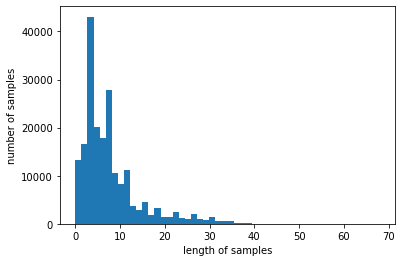

In [10]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences = tokenized_data, 
    size = 100, # 문자 벡터 차원 수
    window = 5, # 문자열 창 크기 : 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지 결정
    min_count = 15, # 최소 문자 수
    workers = 4, # 병렬 처리 스레드 수
    sg = 1 #0은 CBOW, 1은 Skip-gram
    #CBOW는 주변에 있는 단어로 중간에 있는 단어를 예측
    #Skip-gram은 중심 단어에서 주변 단어를 예측
)

### gensim 패키지에 있는 most_similar라는 함수는 두 벡터 사이의 코사인 유사도를 구해 그 값이 큰 순서대로 출력한다.

In [22]:
print(model.wv.most_similar("배우"))

[('연기자', 0.7942378520965576), ('김정훈', 0.7300235033035278), ('김고은', 0.7114251255989075), ('배우진', 0.7071328163146973), ('유오성', 0.7044543623924255), ('마동석', 0.6999709010124207), ('여배우', 0.6977525949478149), ('조연', 0.6961347460746765), ('김승우', 0.6946354508399963), ('신성일', 0.6899495124816895)]


In [23]:
print(model.wv.most_similar("재미없다"))

[('와나', 0.6619777083396912), ('어우', 0.6505941152572632), ('졸림', 0.6405286192893982), ('드릅', 0.6397594809532166), ('넘겨보다', 0.6386389136314392), ('재미', 0.6374932527542114), ('였음', 0.6324415802955627), ('이러케', 0.6279904842376709), ('정색', 0.6254084706306458), ('잔인', 0.6182442307472229)]


In [32]:
print(model.wv.most_similar("추천"))

[('강추', 0.7299482822418213), ('권하다', 0.7225598096847534), ('해드리다', 0.7192843556404114), ('강력', 0.7091928720474243), ('적극', 0.6892544031143188), ('천하다', 0.6528226137161255), ('비추다', 0.6470037698745728), ('보삼', 0.6453430652618408), ('영화광', 0.6445283889770508), ('수면제', 0.6395381689071655)]


In [30]:
print(model.wv.most_similar(positive=["악역","연기"]))

[('미스캐스팅', 0.8280438184738159), ('김민준', 0.8262157440185547), ('이유리', 0.7996151447296143), ('엄태웅', 0.7966513633728027), ('이성재', 0.7958521246910095), ('조연', 0.7944271564483643), ('역활', 0.7891296148300171), ('유해진', 0.7800533771514893), ('배역', 0.7777500152587891), ('남자배우', 0.7766700983047485)]


In [31]:
print(model.wv.most_similar(positive=["전개"],topn=10))

[('전개도', 0.836127519607544), ('부진하다', 0.7892590761184692), ('느슨하다', 0.7806344032287598), ('빨르다', 0.7791247367858887), ('속도', 0.7722041606903076), ('급전', 0.7580875158309937), ('구성', 0.7533886432647705), ('장황하다', 0.7530919313430786), ('진행', 0.7524441480636597), ('템포', 0.7482414841651917)]


In [29]:
print(model.wv.most_similar("장르",topn=10))

[('미스터리', 0.769260823726654), ('분류', 0.7458217144012451), ('스릴러', 0.740767240524292), ('혼합', 0.7152386903762817), ('코메디', 0.6868184804916382), ('불문', 0.6798537969589233), ('오컬트', 0.679168701171875), ('호러', 0.6790802478790283), ('표방', 0.6760073900222778), ('정통', 0.6733748316764832)]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


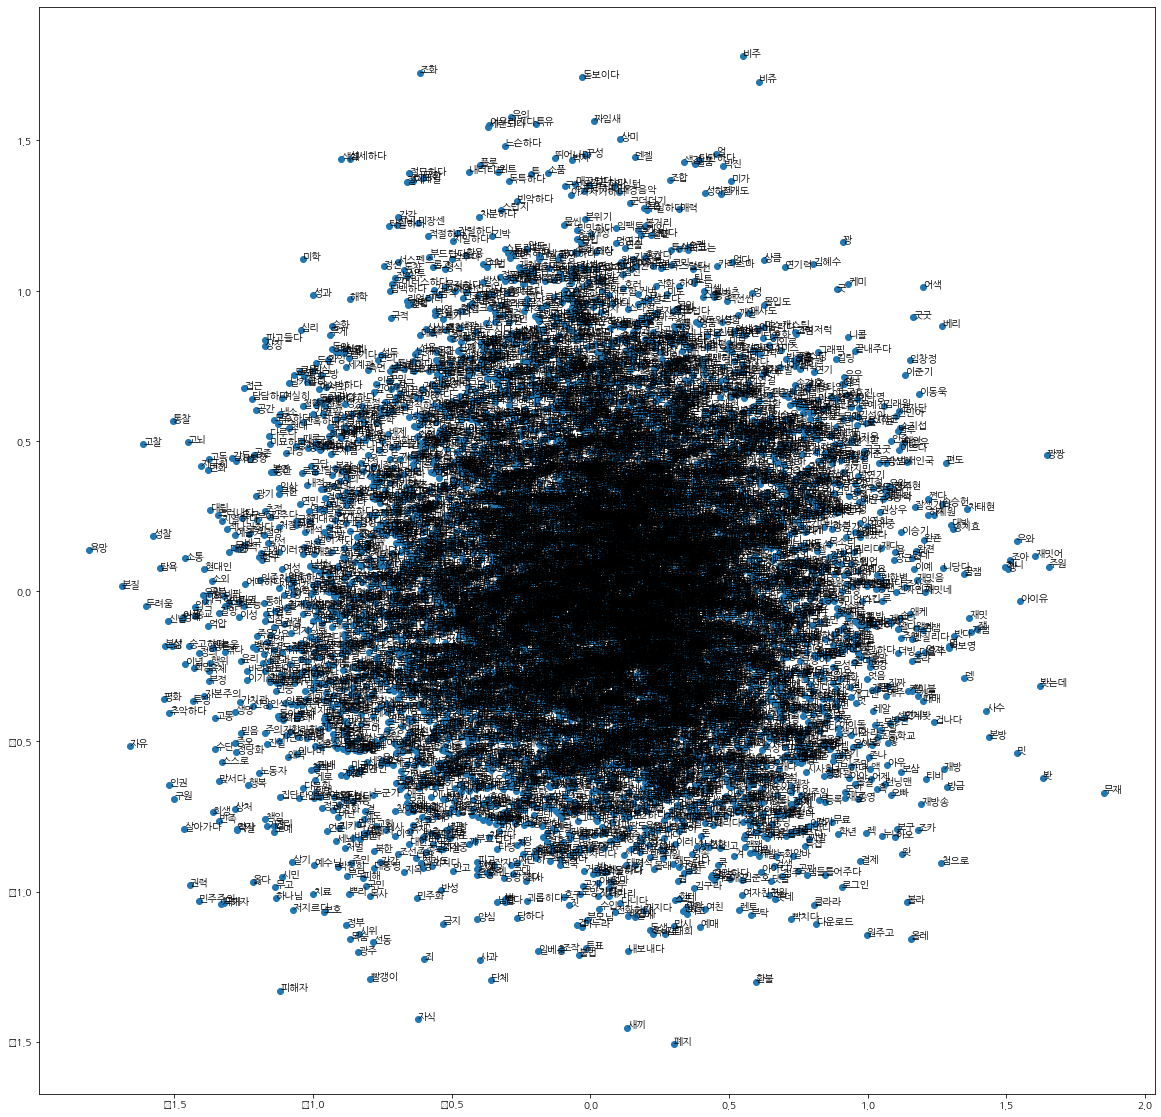

In [27]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fm._rebuild()

plt.rc('font', family='NanumGothic')

import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(20,20))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)